This notebook takes the data already provided and runs the analysis required to produce the mixing coefficient, our quantity of intrest. Basilisk code is provided which should allow you to reproduce this data should you wish to. If you are using your own data please note that this code assumes the simulations ran all the way to completion. To check that this is true make sure that mix20.000 is present in both the data folders. A free space for code is left at the end to allow you to perform to uncertainty estimate yourself.

100%|██████████| 801/801 [00:13<00:00, 59.34it/s]


0.1801942229860114


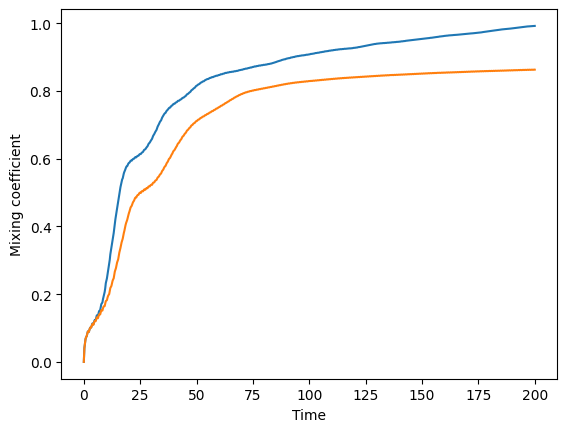

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

#Hard code some parameters that we know
max_iters = 801
step = 0.25

#First run

#If you are using the provided data
pref = "data/mu_0.0015/mix"

#If you are using your own data please uncomment the following line
#pref = "own_data/mu_0.1/"

suf = ".dat"
mix_coeff = []

#Loop over time
for i in tqdm(range(max_iters)):
  sq_sum = 0
  #Assemble the filename
  file = pref + f"{step*i:.3f}" + suf
  #Load the data
  data = np.genfromtxt(file)
  #Find which cells contain liquid
  liquid_data = data[np.where(abs(data[:,3]-1)<0.999)]
  num_cells = len(liquid_data[:,3])

  #Loop over cells
  #Calculate mixing coefficient
  for j in range(num_cells):
    sq_sum=sq_sum + liquid_data[j,2]**2
  sigma_sq = (sq_sum/num_cells) - np.mean(liquid_data[:,2])**2

  #Store the first value as simga_0
  if (i==0):
    sigma_0 = sigma_sq

  mix_coeff.append(1 - (sigma_sq/sigma_0))

#Second run

#If you are using the provided data
pref = "data/mu_0.003/mix"

#If you are using your own data please uncomment the following line
#pref = "own_data/mu_0.15/"

mix_coeff_2 = []

#Loop over time
for i in tqdm(range(max_iters)):
  sq_sum = 0
  #Assemble the filename
  file = pref + f"{step*i:.3f}" + suf
  #Load the data
  data = np.genfromtxt(file)
  #Find which cells contain liquid
  liquid_data = data[np.where(abs(data[:,3]-1)<0.999)]
  num_cells = len(liquid_data[:,3])

  #Loop over cells
  #Calculate mixing coefficient
  for j in range(num_cells):
    sq_sum=sq_sum + liquid_data[j,2]**2
  sigma_sq = (sq_sum/num_cells) - np.mean(liquid_data[:,2])**2

  if (i==0):
    sigma_0 = sigma_sq

  mix_coeff_2.append(1 - (sigma_sq/sigma_0))

#Calculate uncertainty
max_diff = 0
for i in range(0,max_iters):
  diff = mix_coeff[i]-mix_coeff_2[i]
  if diff>max_diff:
    max_diff = diff
print(max_diff)

#Plot the mixing coefficients over time
plt.figure(0)
plt.plot(np.linspace(0,max_iters-1,max_iters)*step,mix_coeff)
plt.plot(np.linspace(0,max_iters-1,max_iters)*step,mix_coeff_2)
plt.xlabel("Time")
plt.ylabel("Mixing coefficient")
plt.show()